### Mount Google Drive and setup paths

In [1]:
import os
import sys

from google.colab import drive

DRIVE_MOUNT_PATH = '/content/drive'
drive.mount(DRIVE_MOUNT_PATH)

PRJ_DIR = os.path.join(DRIVE_MOUNT_PATH, 'My Drive/yyColab/1st-DL-CVMarathon')
sys.path.append(PRJ_DIR)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 作業

實作模糊與邊緣檢測

- 透過 Gaussian Filter 實作模糊操作
- 透過 Sobel Filter 實作邊緣檢測

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

PLT_FIG_BASE = 6

img_path = os.path.join(PRJ_DIR, 'data/lena.png')
img = cv2.imread(img_path)

## 模糊

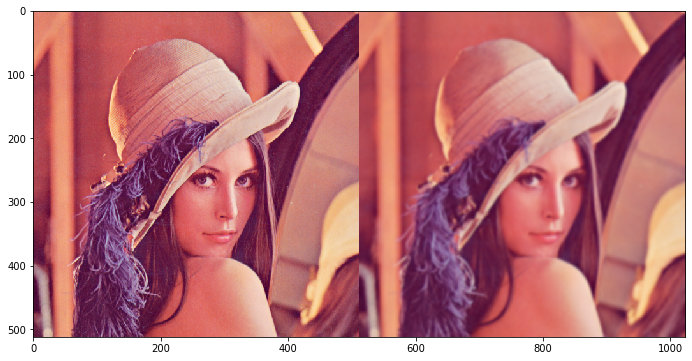

In [3]:
img_blur = img.copy()

# 重複多次 Gaussian 模糊的操作來加深模糊的程度
img_blur = cv2.GaussianBlur(img_blur, (5, 5), 0)
img_blur = cv2.GaussianBlur(img_blur, (5, 5), 0)
img_blur = cv2.GaussianBlur(img_blur, (5, 5), 0)

#　組合 + 顯示圖片
img_show = np.hstack((img, img_blur))
plt.figure(figsize=(PLT_FIG_BASE*2, PLT_FIG_BASE))
plt.imshow(img_show[:, :, ::-1])
plt.show()

## 邊緣檢測

### 組合 x-axis, y-axis 的影像合成

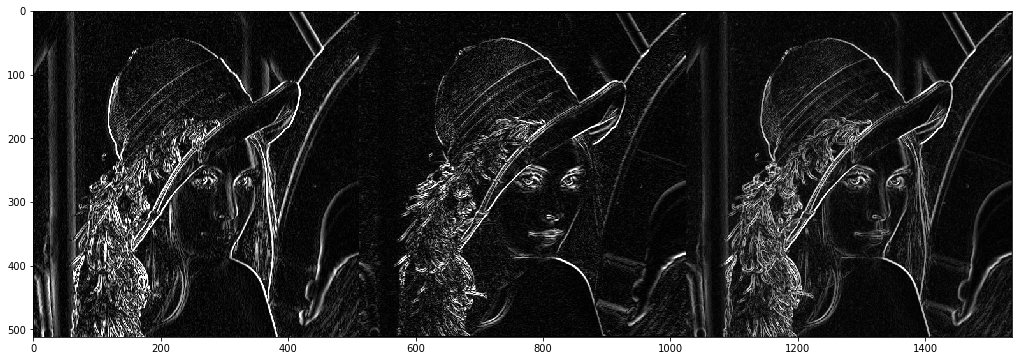

In [4]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 對 x 方向做 Sobel 邊緣檢測
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16S, dx=1, dy=0, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

# 對 y 方向做 Sobel 邊緣檢測
img_sobel_y = cv2.Sobel(img_grey, cv2.CV_16S, dx=0, dy=1, ksize=3)
img_sobel_y = cv2.convertScaleAbs(img_sobel_y)

# x, y 方向的邊緣檢測後的圖各以一半的全重進行合成
img_sobel_combine = cv2.addWeighted(img_sobel_x, 0.5, img_sobel_y, 0.5, 0)

#　組合 + 顯示圖片
img_show = np.hstack((img_sobel_x, img_sobel_y, img_sobel_combine))
plt.figure(figsize=(PLT_FIG_BASE*3, PLT_FIG_BASE))
plt.imshow(img_show, cmap='gray')
plt.show()

### 比較 Sobel 如果在 uint8 的情況下做會 overflow 的狀況

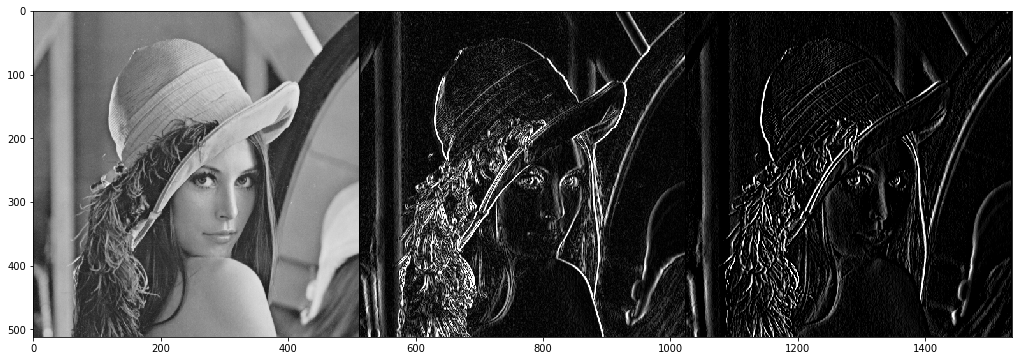

In [5]:
# 轉為灰階圖片
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 對 x 方向以包含負數的資料格式 (cv2.CV_16S) 進行 Sobel 邊緣檢測
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16S, dx=1, dy=0, ksize=3)

# 對 x 方向依照比例縮放到所有數值都是非負整數
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

# 對 x 方向直接以非負整數的資料格式 (uint8) 進行 Sobel 邊緣檢測
img_sobel_x_uint8 = cv2.Sobel(img_grey, cv2.CV_8U, dx=1, dy=0, ksize=3)

#　組合 + 顯示圖片
img_show = np.hstack((img_grey, img_sobel_x, img_sobel_x_uint8))
plt.figure(figsize=(PLT_FIG_BASE*3, PLT_FIG_BASE))
plt.imshow(img_show, cmap='gray')
plt.show()

### 比較一次與兩次計算偏微分的結果

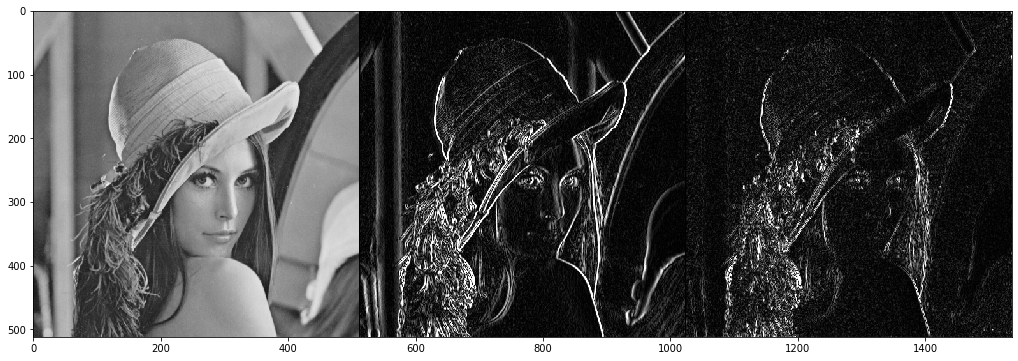

In [6]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 求一次導數取得邊緣檢測結果
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16S, dx=1, dy=0, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

# 求二次導數取得邊緣檢測結果
img_sobel_xx = cv2.Sobel(img_grey, cv2.CV_16S, dx=2, dy=0, ksize=3)
img_sobel_xx = cv2.convertScaleAbs(img_sobel_xx)

#　組合 + 顯示圖片
img_show = np.hstack((img_grey, img_sobel_x, img_sobel_xx))
plt.figure(figsize=(PLT_FIG_BASE*3, PLT_FIG_BASE))
plt.imshow(img_show, cmap='gray')
plt.show()